In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt

from modules import machine_learning_utils as mlu

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle("../../data_lake/output/test.pkl")

In [4]:
model = joblib.load('../../data_lake/output/trained_model_v1.pkl')

In [5]:
scaler = joblib.load('../../data_lake/output/log_scaler_bi.pkl')

# 2.0 Feature engineering

In [7]:
df = mlu.features_eng(df,'anomaly')

# 3.0 Model testing

In [8]:
cols = ['card1', 'card2', 'card3','card5','M4', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38','num_transaction_per_time']

In [9]:
df = df.drop(columns=cols)

In [10]:
for i in df:
    if df[i].dtypes == 'object':
        df[i] = df[i].astype(str)

In [11]:
X_test = df.drop(columns='isFraud')
y_test = df['isFraud'].astype(float)

Test results...
Model Test Recall: 0.8633578431372549
--------------------------------------------------
Model Test Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.91     20003
         1.0       0.32      0.86      0.46      1632

    accuracy                           0.85     21635
   macro avg       0.65      0.86      0.69     21635
weighted avg       0.94      0.85      0.88     21635

ProductCD: 0.3204076362998419
TransactionAmt: 0.14343000107184956
card4: 0.13104672782140595
P_emaildomain: 0.025223769402368465
addr2: 0.012033488338027181
multi_transaction_per_time: 0.006267940261555033
R_emaildomain: 0.0051341140250081435
device_info_v4: 0.00510613494903186
DeviceType: 0.003658257210281853
max_d: 0.002309863815483917
max_c: 0.0014520695771733966
card6: 0.0010054128432358431
addr1: 3.549110105942713e-05
browser_enc: 2.5990696714438614e-05


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(add_indicator=True,
                                                                                    estimator=ExtraTreesRegressor(n_estimators=5,
                                                                                                                  random_state=1),
                                                                                    random_state=1)),
                                                                  ('scaler',
                                                                   FunctionTransformer(func=<function log_transform at 0x7f648f5754c0>))]),
                                                  Index(['TransactionAmt', 'max_c', 'max_d',...
                                 

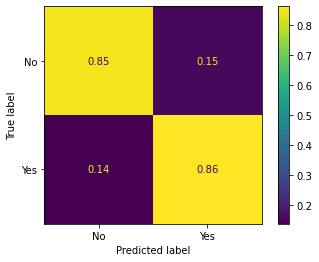

In [12]:
mlu.model_evaluation(model, X_test, y_test)

## 3.1 ML Model score

In [13]:
df['probability_score'] = model.predict_proba(X_test)[:,1]

<AxesSubplot:>

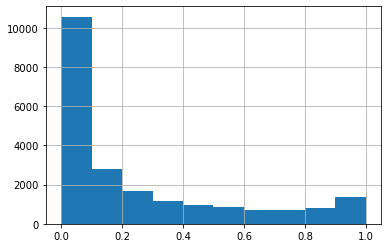

In [ ]:
df['probability_score'].hist()

## 3.2 HK Model score

In [15]:
df = mlu.log_beta_transform(df,scaler,'max_c','max_d')

In [16]:
df = mlu.warning_score(df)

<AxesSubplot:>

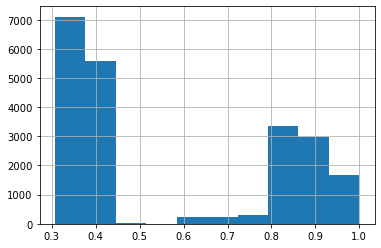

In [18]:
df['warning_score'].hist()

## 3.3 Final model score

In [20]:
df['final_score'] = df.apply(lambda x: mlu.beta_fusion(x['probability_score'],x['warning_score'],0.6),axis=1)

<AxesSubplot:>

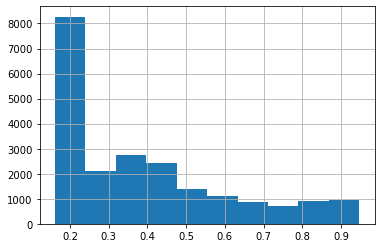

In [21]:
df['final_score'].hist()

In [30]:
df.sample(1)

,isFraud,TransactionAmt,ProductCD,card4,card6,addr1,addr2,P_emaildomain,R_emaildomain,DeviceType,max_c,max_d,multi_transaction_per_time,browser_enc,device_info_v4,probability_score,warning_score,final_score
78534,1,20.785,C,visa,credit,nan,nan,anonymous.com,anonymous.com,mobile,1.0,317.0,0,chrome,huawei,0.983515,0.404458,0.726703
